In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
pd.set_option('display.max_colwidth', -1)
data = json.load(open('accuracies_k=3.json'))
df = pd.concat({k: pd.DataFrame(v,) for k, v in data.items()}, axis=0)

/Users/theo/anaconda3/envs/one_shot_scale_invariance/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [44]:
data = np.concatenate((np.array(df['implementation_0'].to_list()),np.array(df['implementation_1'].to_list())), axis=1)


cols = [
    "implementation_0_0", "implementation_0_1", "implementation_0_2",
    "implementation_1_0", "implementation_1_1", "implementation_1_2"
]
df = pd.DataFrame(data, columns=cols, index=df.index)

### Implementation 0 Plots

In [64]:
imp_0_df = pd.DataFrame(index=df.index)

In [65]:
imp_0_df['mean_acc'] = df['implementation_0'].apply(lambda x: np.mean(x))
imp_0_df['std_acc'] = df['implementation_0'].apply(lambda x: np.std(x))

<AxesSubplot:>

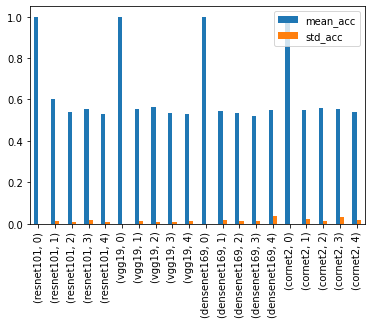

In [67]:
imp_0_df.plot.bar()

In [49]:
df.mean(axis=1).groupby(level=0).mean()

cornet2        0.668546
densenet169    0.649875
resnet101      0.664787
vgg19          0.621805
dtype: float64

In [42]:
df.groupby(level=0).mean()

,implementation_2,implementation_0_mean,implementation_0_std,implementation_1_mean,implementation_1_std
cornet2,NaN,0.639599,0.016623,0.697494,0.017072
densenet169,NaN,0.628070,0.016466,0.671679,0.016148
resnet101,NaN,0.643609,0.009573,0.685965,0.025376
vgg19,NaN,0.636090,0.008190,0.607519,0.020357


In [36]:
df['implementation_0_mean'] = df['implementation_0'].apply(lambda x: np.mean(x))
df['implementation_0_std'] = df['implementation_0'].apply(lambda x: np.std(x))
df['implementation_1_mean'] = df['implementation_1'].apply(lambda x: np.mean(x))
df['implementation_1_std'] = df['implementation_1'].apply(lambda x: np.std(x))
df.drop(columns=["implementation_0", "implementation_1"], inplace=True)